In [199]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import plotly.express as px
 
from fbprophet import Prophet
from sklearn.metrics import r2_score
 
plt.style.use("ggplot")
 
df0=pd.read_csv("https://raw.githubusercontent.com/AmiAnurag/Covid-19-Prediction-Using-Fbprophet/main/CONVENIENT_global_confirmed_cases%5B1%5D.csv")
df1=pd.read_csv("https://raw.githubusercontent.com/AmiAnurag/Covid-19-Prediction-Using-Fbprophet/main/CONVENIENT_global_deaths%5B1%5D.csv")

In [200]:
df0.head(7)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,...,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1/28/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
df1.head(7)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,...,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1/28/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
world=pd.DataFrame({"Country":[],"Cases":[]})
world["Country"]=df0.iloc[:,1:].columns
cases=[]
for i in world.Country:
  cases.append(pd.to_numeric(df0[i][1:]).sum())
world.Cases=cases

From the information about data i know that it has . and () for depicting same country but different region

In [203]:
print([x for x in world.Country if '.' in x or '(' in x])

['Australia.1', 'Australia.2', 'Australia.3', 'Australia.4', 'Australia.5', 'Australia.6', 'Australia.7', 'Canada.1', 'Canada.2', 'Canada.3', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7', 'Canada.8', 'Canada.9', 'Canada.10', 'Canada.11', 'Canada.12', 'Canada.13', 'Canada.14', 'Canada.15', 'China.1', 'China.2', 'China.3', 'China.4', 'China.5', 'China.6', 'China.7', 'China.8', 'China.9', 'China.10', 'China.11', 'China.12', 'China.13', 'China.14', 'China.15', 'China.16', 'China.17', 'China.18', 'China.19', 'China.20', 'China.21', 'China.22', 'China.23', 'China.24', 'China.25', 'China.26', 'China.27', 'China.28', 'China.29', 'China.30', 'China.31', 'China.32', 'China.33', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Denmark.1', 'Denmark.2', 'France.1', 'France.2', 'France.3', 'France.4', 'France.5', 'France.6', 'France.7', 'France.8', 'France.9', 'France.10', 'France.11', 'Netherlands.1', 'Netherlands.2', 'Netherlands.3', 'Netherlands.4', 'New Zealand.1', 'United Kingdom.1', 'United Kingd

In [204]:
world.iloc[8:16,:]

,Country,Cases
8,Australia,124.0
9,Australia.1,11558.0
10,Australia.2,199.0
11,Australia.3,1926.0
12,Australia.4,868.0
13,Australia.5,235.0
14,Australia.6,21041.0
15,Australia.7,1059.0


In [205]:
country_list=list(world["Country"].values)
count=0
for i in country_list:
  locat=0
  for j in i:
    if j=='.':
      i=i[:locat]
      country_list[count]=i
    elif j=='(':
      i=i[:locat-1] #remove the space also
      country_list[count]=i
    else:
      locat+=1
  count+=1

world['Country']=country_list
world=world.groupby("Country")['Cases'].sum().reset_index()
world.head()

,Country,Cases
0,Afghanistan,150778.0
1,Albania,133981.0
2,Algeria,182368.0
3,Andorra,14836.0
4,Angola,43747.0


In [206]:
print([x for x in world.Country if '.' in x or '(' in x])

[]


In [207]:
world.iloc[8:9,:]

,Country,Cases
8,Australia,37010.0


In [208]:
continent=pd.read_csv('https://raw.githubusercontent.com/AmiAnurag/Covid-19-Prediction-Using-Fbprophet/main/continents2%5B1%5D.csv')
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [209]:
continent.name=continent.name.str.upper()
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFGHANISTAN,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,ÅLAND ISLANDS,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,ALBANIA,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,ALGERIA,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,AMERICAN SAMOA,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


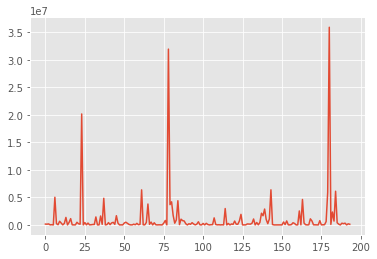

In [210]:
plt.plot(world.Cases)

**Now its all about making the data visualization more magnificient**

### World wide spread of covid

In [211]:
world['Case Range']=pd.cut(world['Cases'],[-150000,50000,200000,800000,1500000,150000000],labels=[0,50,200,800,1500])
world.head()

,Country,Cases,Case Range
0,Afghanistan,150778.0,50
1,Albania,133981.0,50
2,Algeria,182368.0,50
3,Andorra,14836.0,0
4,Angola,43747.0,0


In [212]:
world['Case Range'].unique()

[50, 0, 1500, 200, 800]
Categories (5, int64): [0 < 50 < 200 < 800 < 1500]

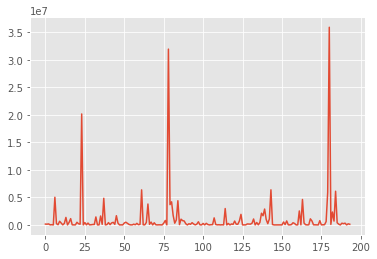

In [213]:
world.Cases.plot()

In [214]:
alpha=[]
for i in world.Country.str.upper().values:
  if i =='BRUNEI':
    i= 'BRUNEI DARUSSALAM'
  elif i=='US':
    i="UNITED STATES"
  if len(continent[continent['name']==i]['alpha-3'].values)==0:
    alpha.append(np.nan)
  else:
    alpha.append(continent[continent['name']==i]['alpha-3'].values[0])
world['Alpha3']=alpha



In [215]:
alpha=[]
for i in world.Country.str.upper().values:
  if i =='BRUNEI':
    i= 'BRUNEI DARUSSALAM'
  elif i=='US':
    i="UNITED STATES"
  if len(continent[continent['name']==i]['alpha-2'].values)==0:
    alpha.append(np.nan)
  else:
    alpha.append(continent[continent['name']==i]['alpha-2'].values[0])
world['Alpha2']=alpha



In [216]:
continent[continent['name']=='AFGHANISTAN'] #THIS IS THE ALPHA-3 VALUE IN THIRD COLUMN

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFGHANISTAN,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN


In [217]:
world.columns

Index(['Country', 'Cases', 'Case Range', 'Alpha3', 'Alpha2'], dtype='object')

In [245]:
fig=px.choropleth(world.dropna(),locations="Alpha3",color="Case Range",projection='natural earth',hover_data=['Cases'],hover_name='Country')
fig.show()

In [219]:
df0.head() #confirm case

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,Australia.2,Australia.3,Australia.4,Australia.5,Australia.6,Australia.7,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,...,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom.1,United Kingdom.2,United Kingdom.3,United Kingdom.4,United Kingdom.5,United Kingdom.6,United Kingdom.7,United Kingdom.8,United Kingdom.9,United Kingdom.10,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualize the daily growing covid cases world wide

In [220]:
case_count=[]
for i in range(1,len(df0)):
  case_count.append(sum(pd.to_numeric(df0.iloc[i,1:])))

case_data=pd.DataFrame({'Date':df0['Country/Region'][1:],'Covid Case Count':case_count})

In [221]:
case_data['Date']=pd.to_datetime(case_data['Date'])
case_data.set_index('Date',inplace=True)

In [222]:
case_data.head()

,Covid Case Count
Date,
2020-01-23,98.0
2020-01-24,286.0
2020-01-25,492.0
2020-01-26,685.0
2020-01-27,809.0


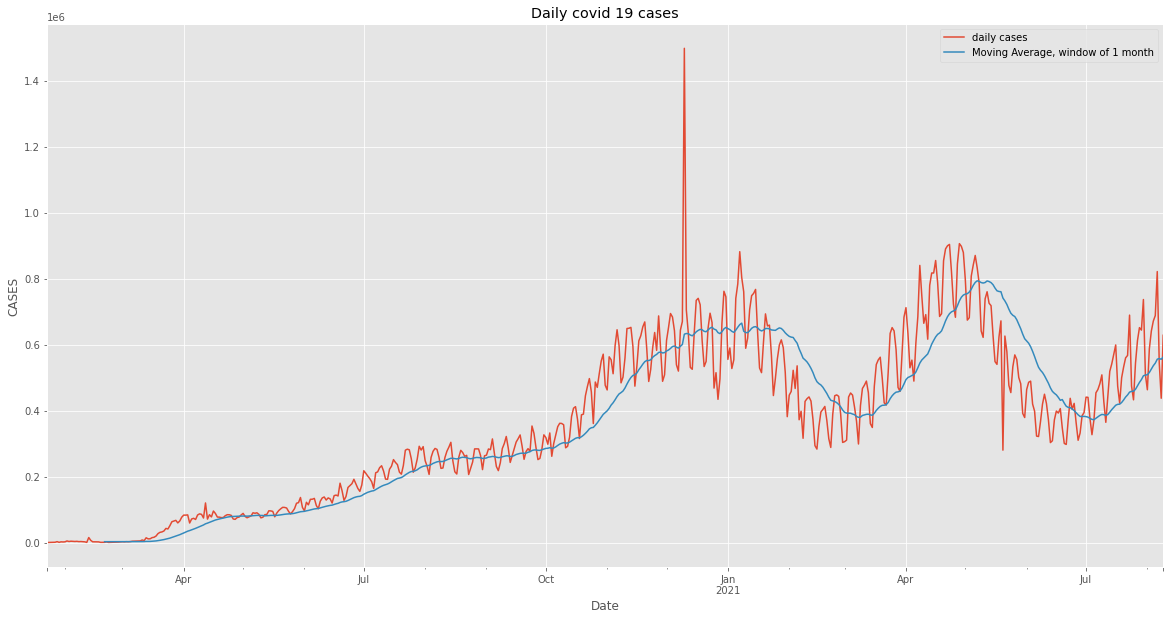

In [223]:
case_data['Covid Case Count'].plot(title='Daily covid 19 cases',figsize=(20,10),label="daily cases")
case_data['Covid Case Count'].rolling(window=30).mean().plot(label="Moving Average, window of 1 month")
plt.ylabel("CASES")
plt.legend()
plt.show()

In [224]:
case_data['Covid Case Count'].rolling(window=5).mean().head()

Date
2020-01-23      NaN
2020-01-24      NaN
2020-01-25      NaN
2020-01-26      NaN
2020-01-27    474.0
Name: Covid Case Count, dtype: float64

### Prediction of the covid cases for next 250 days using FBprophet

In [225]:
case_data.isnull().sum()

Covid Case Count    0
dtype: int64

In [226]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [227]:
model=Prophet(weekly_seasonality=False)

In [228]:
case_data.head(3)

,Covid Case Count
Date,
2020-01-23,98.0
2020-01-24,286.0
2020-01-25,492.0


In [229]:
case_data['ds']=case_data.index
case_data['y']=case_data['Covid Case Count']
case_data.head()

,Covid Case Count,ds,y
Date,,,
2020-01-23,98.0,2020-01-23,98.0
2020-01-24,286.0,2020-01-24,286.0
2020-01-25,492.0,2020-01-25,492.0
2020-01-26,685.0,2020-01-26,685.0
2020-01-27,809.0,2020-01-27,809.0


In [230]:
model_data=case_data.iloc[:,1:]
model_data.reset_index(inplace=True)
model_data.drop(columns=['Date'],inplace=True)
model_data.head()

,ds,y
0,2020-01-23,98.0
1,2020-01-24,286.0
2,2020-01-25,492.0
3,2020-01-26,685.0
4,2020-01-27,809.0


In [231]:
model.fit(model_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [232]:
future_dates=model.make_future_dataframe(periods=250)
prediction=model.predict(future_dates)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
810,2022-04-12,358989.222225,159638.951157,564082.203768,237155.303956,500966.012743,0.0,0.0,0.0,0.0,0.0,0.0,358989.222225
811,2022-04-13,358409.087517,176260.673311,571239.162963,235700.981467,501120.929499,0.0,0.0,0.0,0.0,0.0,0.0,358409.087517
812,2022-04-14,357828.952808,176002.998394,578155.441497,234416.506790,501275.846256,0.0,0.0,0.0,0.0,0.0,0.0,357828.952808
813,2022-04-15,357248.818100,160417.526549,559838.187600,233401.853941,501430.763013,0.0,0.0,0.0,0.0,0.0,0.0,357248.818100
814,2022-04-16,356668.683391,162531.247954,557468.853061,232443.526703,501585.679769,0.0,0.0,0.0,0.0,0.0,0.0,356668.683391


In [233]:
model_data.tail()

,ds,y
560,2021-08-05,687940.0
561,2021-08-06,821309.0
562,2021-08-07,544732.0
563,2021-08-08,437309.0
564,2021-08-09,628217.0


In [234]:
prediction.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
805,2022-04-07,361889.895768,161931.467837,571179.987125,244203.954420,498872.965464,0.0,0.0,0.0,0.0,0.0,0.0,361889.895768
806,2022-04-08,361309.761060,165374.147937,565310.963259,242869.453212,499507.800957,0.0,0.0,0.0,0.0,0.0,0.0,361309.761060
807,2022-04-09,360729.626351,155100.117563,582166.398096,241515.438474,499832.706086,0.0,0.0,0.0,0.0,0.0,0.0,360729.626351
808,2022-04-10,360149.491643,160413.485295,560024.388600,240127.737153,500656.179230,0.0,0.0,0.0,0.0,0.0,0.0,360149.491643
809,2022-04-11,359569.356934,174931.044425,576916.720270,238685.144837,500811.095986,0.0,0.0,0.0,0.0,0.0,0.0,359569.356934
810,2022-04-12,358989.222225,159638.951157,564082.203768,237155.303956,500966.012743,0.0,0.0,0.0,0.0,0.0,0.0,358989.222225
811,2022-04-13,358409.087517,176260.673311,571239.162963,235700.981467,501120.929499,0.0,0.0,0.0,0.0,0.0,0.0,358409.087517
812,2022-04-14,357828.952808,176002.998394,578155.441497,234416.506790,501275.846256,0.0,0.0,0.0,0.0,0.0,0.0,357828.952808
813,2022-04-15,357248.818100,160417.526549,559838.187600,233401.853941,501430.763013,0.0,0.0,0.0,0.0,0.0,0.0,357248.818100
814,2022-04-16,356668.683391,162531.247954,557468.853061,232443.526703,501585.679769,0.0,0.0,0.0,0.0,0.0,0.0,356668.683391


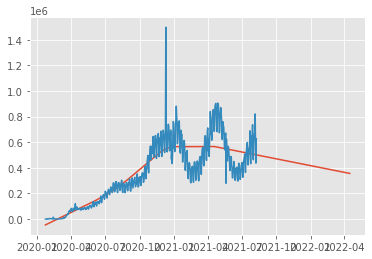

In [235]:
plt.plot(prediction.ds,prediction.yhat)
plt.plot(model_data.ds,model_data.y)
plt.show()

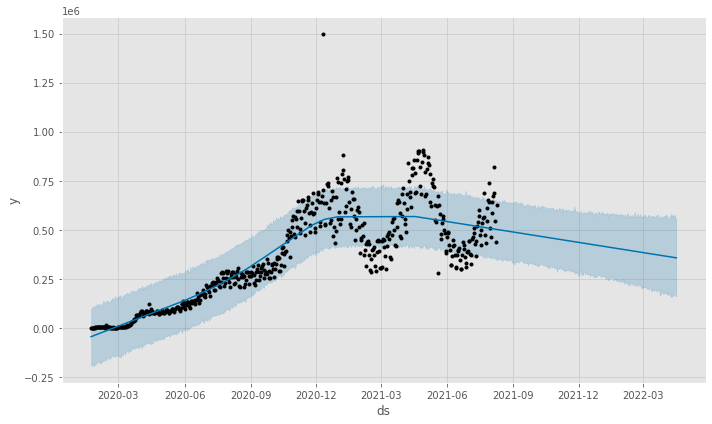

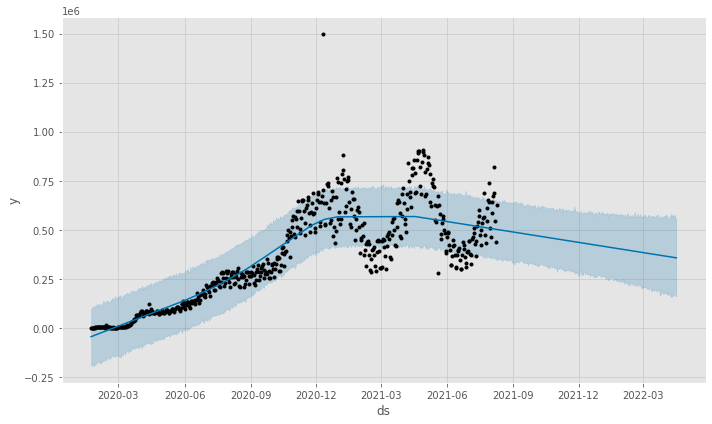

In [236]:
model.plot(prediction)

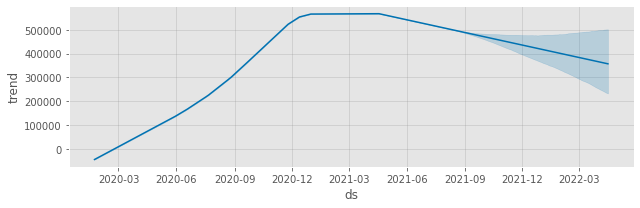

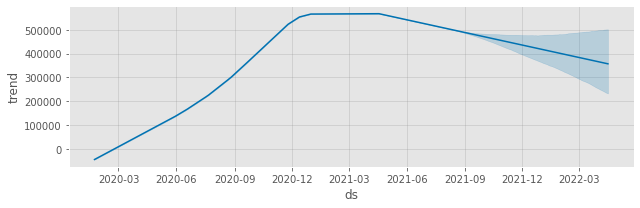

In [237]:
model.plot_components(prediction)

### Cross validation

In [238]:
model_data.shape

(565, 2)

In [239]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,initial="364 days",period='50 day',horizon="50 days")
df_cv.head()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2021-01-21 00:00:00 and 2021-06-20 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-01-22,736329.220873,645716.139807,829143.744461,658971.0,2021-01-21
1,2021-01-23,739374.118831,650142.333432,834242.935035,567915.0,2021-01-21
2,2021-01-24,742419.016789,649231.978785,833750.713419,445498.0,2021-01-21
3,2021-01-25,745463.914747,656432.445578,827220.509104,497063.0,2021-01-21
4,2021-01-26,748508.812704,654605.989063,849437.322208,556509.0,2021-01-21


The initial model will be trained on the first 1,825 days of data. It will forecast the next 60 days of data (because horizon is set to 60). The model will then train on the initial period + the period (1,825 + 30 days in this case) and forecast the next 60 days. It will continued like this, adding another 30 days to the training data and then forecasting for the next 60 until there is no longer enough data to do this.

In summary, period is how much data to add to the training data set in every iteration of cross-validation, and horizon is how far out it will forecast.


In [240]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
195,2021-08-05,553082.909504,398749.350413,692695.414197,687940.0,2021-06-20
196,2021-08-06,553002.325320,411372.124988,702848.799248,821309.0,2021-06-20
197,2021-08-07,552921.741137,411958.122460,699777.425498,544732.0,2021-06-20
198,2021-08-08,552841.156954,419523.123752,702432.427852,437309.0,2021-06-20
199,2021-08-09,552760.572771,404165.113277,684258.558194,628217.0,2021-06-20


In [241]:
df_cv.shape

(200, 6)

In [242]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,2.818682e+10,167889.309656,147148.912320,0.297831,0.271857,0.40
1,6 days,3.104803e+10,176204.518904,161207.578311,0.305414,0.287525,0.25
2,7 days,3.507895e+10,187293.746062,177797.272317,0.340031,0.296167,0.15
3,8 days,3.346295e+10,182928.805270,174712.942351,0.343150,0.309750,0.10
4,9 days,3.125409e+10,176788.261419,164288.975306,0.331843,0.309750,0.20


In [243]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
41,46 days,1.652772e+11,406543.042246,360436.447137,0.754401,0.738578,0.25
42,47 days,1.716124e+11,414261.279067,372106.985642,0.768326,0.727549,0.20
43,48 days,1.742238e+11,417401.279234,370263.222885,0.738542,0.713814,0.20
44,49 days,1.811935e+11,425668.293930,376012.401709,0.724092,0.748159,0.20
45,50 days,1.853050e+11,430470.625520,378857.864838,0.718746,0.748649,0.20


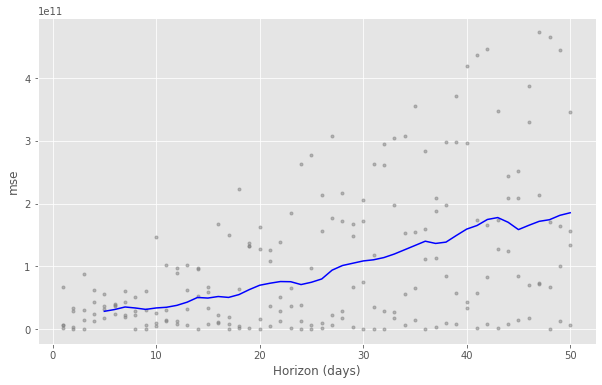

In [244]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')